# Projeto - Analise de custos de startups
No presente projeto será realizado a analise de custos de startups divididas em 3 estados estadunidenses. 
O DataFrame possui as seguintes colunas:<br>
**R&D Spend** = gastos com pesquisa e desenvolvimento;<br>
**Marketing Spend** = gastos com marketing;<br>
**Administration** = gastos com administração;<br>
**State** = estado aonde as startups estão localizadas;<br>
**Profits** = lucros das statups; <br>
<br>

O objetivo de tal projeto é realizar uma analise exploratoria a respeito dos respectivos gastos das startups, e assim aplicar um algoritimo de Machine Learning para prever possíveis lucros em relação aos gastos. 



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_csv('50_startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Um dos primeiros passos desta análise, é verificar o tamanho do DataFrame, e se o mesmo possui algum valor faltante. Para realizar esta analise, será utilizado o método **.info()**.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


O DF(DataFrame) possui 50 entradas, e nenhum valor faltante nas colunas. 

Agora vamos analisar em quais estados as starttups estão divididas e assim aplicar um metodo groupby(), para encontrar a média de valores de cada estado.

In [5]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [4]:
g = df.groupby('State')

In [6]:
g.mean()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,64657.674118,120746.507059,182540.929412,103905.175294
Florida,80724.016250,121768.897500,247323.551250,118774.024375
New York,76195.062353,121543.470588,205346.015882,113756.446471


Para facilitar a visualização, a tabela das médias por estado, será plotada em um gráfico de barras da bibiliotec 'plotly'. 

<Figure size 432x288 with 0 Axes>

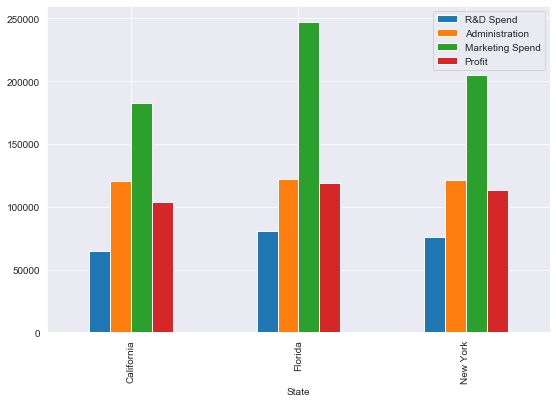

In [10]:
sns.set_style('darkgrid')
g.mean().plot(kind='bar',figsize=(9,6))

Nota-se que é no estado da da Florida onde estão os maiores gastos com marketing, em segundo lugar temos Nova York, que possui um lucro relativamente proximo ao da Florida(estado com maior lucro), mas um gasto com marketing significativamente menor. 

Agora vamos utilizar um **'pairplot'** da biblioteca seaborn para assim tentar encontrar alguma relação de linearedade entre os valores. Passamos um 'Hue', filtrando os estados, para assim poder analisar o desempenho dos mesmos. 

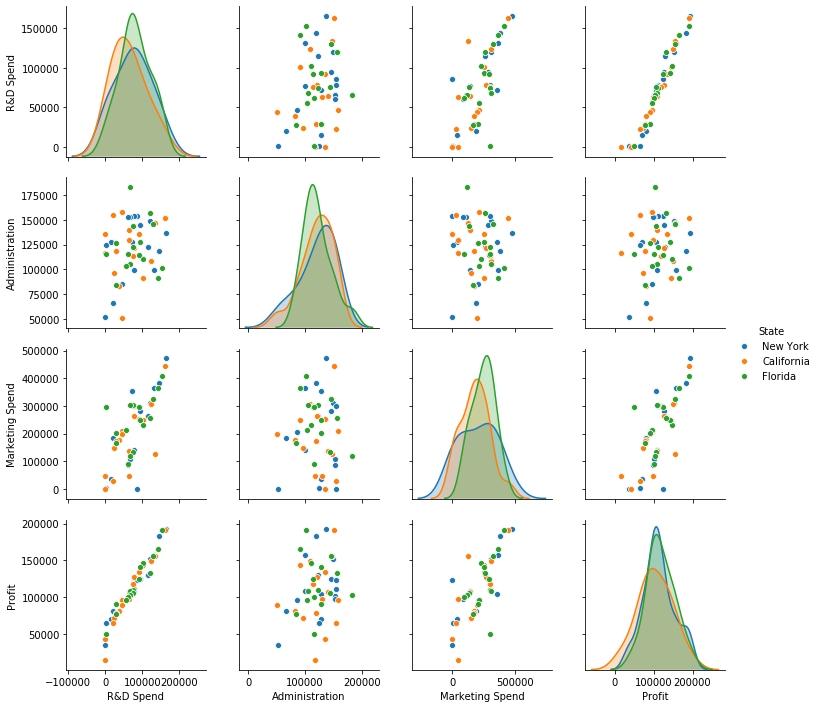

In [20]:
sns.pairplot(df, hue='State')

Nota-se que existe uma lineridade clara entre os gastos com **pesquisa e desenvolvimento(R&D Spend)** e o **lucro(Profit).**
Vamos ver mais de perto utilizando o **'lmplot'** do seaborn. 

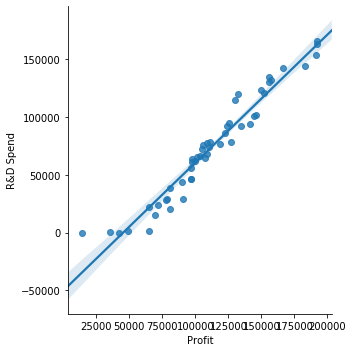

In [19]:
sns.lmplot(x='Profit', y='R&D Spend', data=df)

Faremos o mesmo para analisar os custos com Marketing e Administração. 

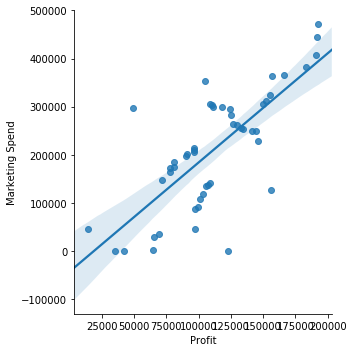

In [21]:
sns.lmplot(x='Profit', y='Marketing Spend',data=df)

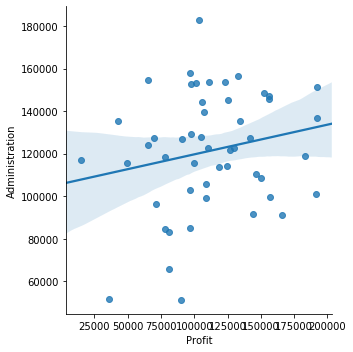

In [22]:
sns.lmplot(x='Profit', y='Administration',data=df)

Há uma leve relação de linearidade entre o **'Marketing Spend'** e o **Profit** (gastos com marketing e lucros).<br>
Já os gastos com administração, não possuem nenhuma linearidade com o lucro das startups. 

# Aplicando a 'Linear Regression' como modelo de previsões
Agora iremos aplicar um algorítmo de Machine Learning para assim prever futuros lucros de acordo com os gastos. <br>
<br>
<br>
Recolhendo dados de treino e teste.

In [24]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [13]:
x = df[['R&D Spend','Administration','Marketing Spend']] 

In [14]:
y = df['Profit']

Importando a o algoritmo de teste e treino do **Sklearn**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

Importando o algoritmos de Regressão Linear **(Linear Regression)**

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(x_train,y_train) # É nesta fase que treinamos o nosso modelo. 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Apresentando o coeficientes encontrados. 

In [20]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,0.813614
Administration,0.013227
Marketing Spend,0.034079


# Analisando os resultados 
Segundo os coeficientes encontrados, se fosse investido **1 dólar** em pesquisa e desenvolvimento, o lucro será de **0,83 dólares;**<br>
<br>
Se fosse investido **1 dólar** em administração o retorno será de **0,01 dólar**, confirmando que gastos na administração não refletem em um bom lucro;<br>
<br>
Se fosse investido **1 dólar** em Marketing o retorno será de **0,03 dólar**, mostrando ser o segundo melhor investimento neste contexto.<br><br>
Realizando uma análise final, o setor de **'Pesquisa e Desenvolvimento'**, é o melhor para se investir.


# Analisando se o modelo realmente funcionou: 

In [21]:
predictions = lm.predict(x_test)

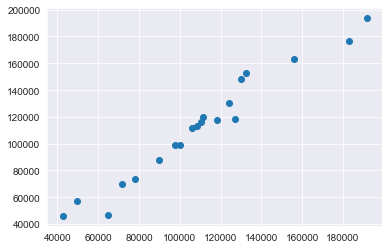

In [22]:
sns.set_style('darkgrid')
plt.scatter(y_test,predictions)

Note que os elementos do grafico formam uma reta, indicando linearidade entre X e Y.